## Business Question
### On which job portals can (German) companies find qualified IT professionals?
Given the current shortage of skilled workers and demographic change, it is increasingly difficult for companies to find qualified talents - especially in the IT segment. Where can companies find qualified IT professionals? With this notebook we will tackle this question and find out which are the TOP job portals for the participants worldwide and in Germany.

In [8]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the necessary dataset
df = pd.read_csv("../input/survey_results_public.csv")

# check the shape of the dataset
df.shape

(51392, 154)

## Data Understanding
In order to get a better understanding of the data, we are am taking a look at some of the characteristics of the dataset. The fields 'JobProfile' and 'Country' are relevant to answer the question above. So let's take a close look at those cokumns in particular.

In [9]:
# Get an overview of the relevant column 'JobProfile'

# show missing values for 'JobProfile'
print(np.sum(df['JobProfile'].isnull() == 1))

# show proportion of missing values for 'JobProfile'
print(df['JobProfile'].isnull().mean())

26673
0.5190107409713575


In [10]:
# list all possible answers in a new dataset

# note that for this purpose (finding top job portals), dropping NaN values for 'JobProfile' is not relevant.
# df['JobProfile'].value_counts(dropna=False)

df_jobprofile = df['JobProfile'].value_counts().reset_index()
df_jobprofile.rename(columns={'index': 'JobPortal', 'JobProfile': 'count'}, inplace=True)
df_jobprofile.head()

,JobPortal,count
0,LinkedIn,14139
1,LinkedIn; Other,1580
2,Other,1181
3,LinkedIn; Xing,626
4,Indeed; LinkedIn,608


## Data preparation
In this case we do not want to look at the rows with missing values. As we only want to take a look at the job portals with the most entries, we can ignore the rows with missing values. But we do want to take apart multiple answers into the single pieces in order to count each relevant entry.

In [11]:
# define function total_count to take apart multiple answers
def total_count(df, col1, col2, look_for):
    '''
    input:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    
    output:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    from collections import defaultdict
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

# define all relevant answers for 'JobProfile'
possible_answers = ["LinkedIn", "Indeed", "Monster", "Hired.com", "Dice", "Talent.io",
                    "StepStone", "Xing", "Reed.co.uk", "Xing", "CW Jobs", "Total Jobs", 
                    "Glassdoor", "JobSite.co.ik", "Remix jobs", "Naukri", "Pracuj"]
        
# execute function 'total count' for the dataset
df_jobprofile = total_count(df_jobprofile, 'JobPortal', 'count', possible_answers)

# add a column to identify the percentage of each answer
df_jobprofile['percent'] = df_jobprofile['count']*100/np.sum(df_jobprofile['count'])
df_jobprofile.head()

,JobPortal,count,percent
0,LinkedIn,21608,63.030162
7,Xing,2896,8.447582
2,Monster,2443,7.126189
1,Indeed,2323,6.776151
10,Naukri,1473,4.296715


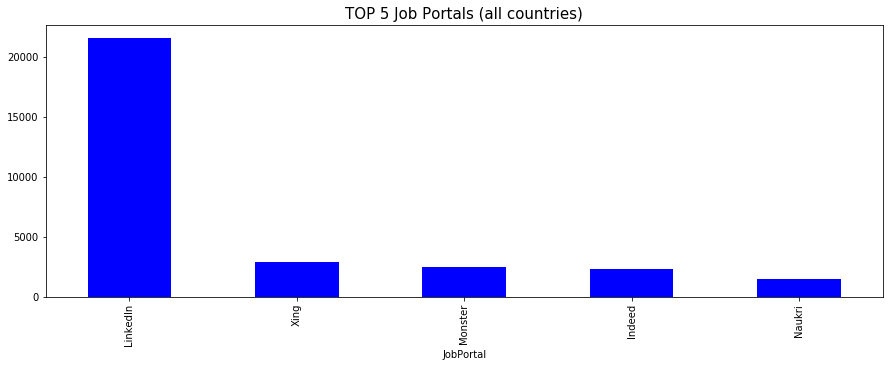

In [12]:
# visualize the results (top 5 job portals) in a bar chart
df_jobprofile = df_jobprofile[:5].copy()
df_jobprofile.sort_values(by='count', ascending=False).plot('JobPortal', 'count', kind="bar", figsize=(15,5), legend=False, color="blue")
plt.title('TOP 5 Job Portals (all countries)', fontsize=15);

In [13]:
# now create a new dataset for participants with current residence in Germany and show the shape
df_germany = df[df['Country'] == 'Germany']
df_germany['Country'].value_counts()

Germany    4143
Name: Country, dtype: int64

In [14]:
# use the same approach as above: list all the relevant answers for 'JobPortal'
df_job_germany = df_germany['JobProfile'].value_counts().reset_index()
df_job_germany.rename(columns={'index': 'JobPortal', 'JobProfile': 'count'}, inplace=True)
df_job_germany.head()


,JobPortal,count
0,LinkedIn; Xing,497
1,Xing,486
2,LinkedIn,317
3,Other,92
4,LinkedIn; Other; Xing,62


In [15]:
# use the same approach as above: take apart multiple answers by using 'total_count'

# execute function 'total_count' for the dataset
df_job_germany = total_count(df_job_germany, 'JobPortal', 'count', possible_answers)

# add a column to identify the percentage of each answer
df_job_germany['percent'] = df_job_germany['count']*100/np.sum(df_job_germany['count'])
df_job_germany.head()

,JobPortal,count,percent
7,Xing,2458,63.977095
0,LinkedIn,1069,27.824050
2,Monster,120,3.123373
6,StepStone,112,2.915148
1,Indeed,40,1.041124


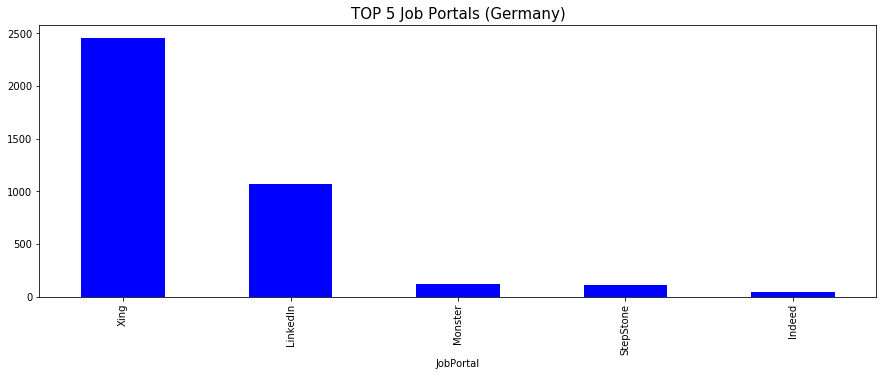

In [16]:
# visualize the results (top 5 job portals) in a bar chart
df_job_germany = df_job_germany[:5].copy()
df_job_germany.sort_values(by='count', ascending=False).plot('JobPortal', 'count', kind="bar", figsize=(15,5), legend=False, color="blue");
plt.title('TOP 5 Job Portals (Germany)', fontsize=15);

## Evaluation
LinkedIn is the most promising adress worldwide if you are looking for IT professionals. In Germany LinkedIn is still well represented, but the most popular job portal for IT professionals in Germany is Xing. The results are very satisfying and the TOP job portal (LinkedIn / Xing) each have a very solid rank with a share of ~ 60 % of all job portals from the survey.